In [919]:
import warnings
warnings.filterwarnings('ignore')

In [920]:
import pandas as pd
import numpy as np
%matplotlib inline

In [921]:
import seaborn as sb
import matplotlib.pyplot as mp 

In [922]:
CarPricesData=pd.read_csv('/content/CarPricesData.csv', encoding='latin')

In [923]:
print('Shape before deleting duplicate values:', CarPricesData.shape)

Shape before deleting duplicate values: (1436, 10)


In [924]:
CarPricesData.head(10)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0
5,12950,32.0,61000,Diesel,90,0,0,2000.0,3,1170.0
6,16900,27.0,94612,Diesel,90,1,0,2000.0,3,1245.0
7,18600,30.0,75889,Diesel,90,1,0,2000.0,3,1245.0
8,21500,27.0,19700,Petrol,192,0,0,1800.0,3,1185.0
9,12950,23.0,71138,Diesel,69,0,0,1900.0,3,1105.0


In [925]:
CarPricesData=CarPricesData.drop_duplicates()

In [926]:
CarPricesData.shape

(1435, 10)

In [927]:
CarPricesData.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0


In [928]:
CarPricesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1435 non-null   int64  
 1   Age        1433 non-null   float64
 2   KM         1435 non-null   int64  
 3   FuelType   1431 non-null   object 
 4   HP         1435 non-null   int64  
 5   MetColor   1435 non-null   int64  
 6   Automatic  1435 non-null   int64  
 7   CC         1433 non-null   float64
 8   Doors      1435 non-null   int64  
 9   Weight     1433 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 123.3+ KB


In [929]:
dum = pd.get_dummies(CarPricesData['FuelType'], dtype=int)
dum

,CNG,Diesel,Petrol
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,0,0,1
1432,0,0,1
1433,0,0,1
1434,0,0,1


In [930]:
merged = pd.concat([CarPricesData,dum],axis='columns')
merged

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,CNG,Diesel,Petrol
0,13500,23.0,46986,Diesel,90,1,0,2000.0,3,1165.0,0,1,0
1,13750,23.0,72937,Diesel,90,1,0,2000.0,3,1165.0,0,1,0
2,13950,24.0,41711,Diesel,90,1,0,2000.0,3,1165.0,0,1,0
3,14950,26.0,48000,Diesel,90,0,0,2000.0,3,1165.0,0,1,0
4,13750,30.0,38500,Diesel,90,0,0,2000.0,3,1170.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,Petrol,86,1,0,1300.0,3,1025.0,0,0,1
1432,10845,72.0,19000,Petrol,86,0,0,1300.0,3,1015.0,0,0,1
1433,8500,71.0,17016,Petrol,86,0,0,1300.0,3,1015.0,0,0,1
1434,7250,70.0,16916,Petrol,86,1,0,1300.0,3,1015.0,0,0,1


In [931]:
final = merged.drop(['FuelType'], axis='columns')
final

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,CNG,Diesel,Petrol
0,13500,23.0,46986,90,1,0,2000.0,3,1165.0,0,1,0
1,13750,23.0,72937,90,1,0,2000.0,3,1165.0,0,1,0
2,13950,24.0,41711,90,1,0,2000.0,3,1165.0,0,1,0
3,14950,26.0,48000,90,0,0,2000.0,3,1165.0,0,1,0
4,13750,30.0,38500,90,0,0,2000.0,3,1170.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,86,1,0,1300.0,3,1025.0,0,0,1
1432,10845,72.0,19000,86,0,0,1300.0,3,1015.0,0,0,1
1433,8500,71.0,17016,86,0,0,1300.0,3,1015.0,0,0,1
1434,7250,70.0,16916,86,1,0,1300.0,3,1015.0,0,0,1


In [932]:
df2 = final
df2

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,CNG,Diesel,Petrol
0,13500,23.0,46986,90,1,0,2000.0,3,1165.0,0,1,0
1,13750,23.0,72937,90,1,0,2000.0,3,1165.0,0,1,0
2,13950,24.0,41711,90,1,0,2000.0,3,1165.0,0,1,0
3,14950,26.0,48000,90,0,0,2000.0,3,1165.0,0,1,0
4,13750,30.0,38500,90,0,0,2000.0,3,1170.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,86,1,0,1300.0,3,1025.0,0,0,1
1432,10845,72.0,19000,86,0,0,1300.0,3,1015.0,0,0,1
1433,8500,71.0,17016,86,0,0,1300.0,3,1015.0,0,0,1
1434,7250,70.0,16916,86,1,0,1300.0,3,1015.0,0,0,1


In [933]:

df = pd.DataFrame(df2, columns = ['Age','Weight','HP', 'CC','Price','KM'])  
df

,Age,Weight,HP,CC,Price,KM
0,23.0,1165.0,90,2000.0,13500,46986
1,23.0,1165.0,90,2000.0,13750,72937
2,24.0,1165.0,90,2000.0,13950,41711
3,26.0,1165.0,90,2000.0,14950,48000
4,30.0,1170.0,90,2000.0,13750,38500
...,...,...,...,...,...,...
1431,69.0,1025.0,86,1300.0,7500,20544
1432,72.0,1015.0,86,1300.0,10845,19000
1433,71.0,1015.0,86,1300.0,8500,17016
1434,70.0,1015.0,86,1300.0,7250,16916


<AxesSubplot:>

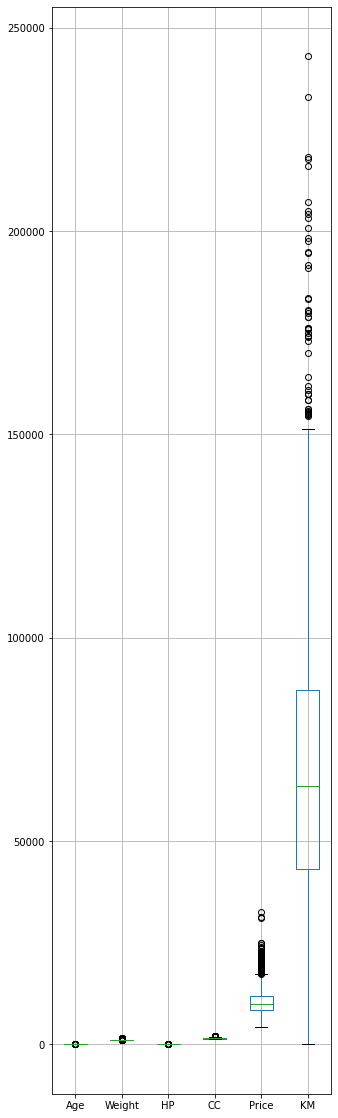

In [934]:

mp.figure(figsize = (5, 20)) 
  
df.boxplot()

In [935]:
def replace_outliers_median(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    x[x < lower_bound] = np.median(x)
    x[x > upper_bound] = np.median(x)
    return x

# Define a function to replace outliers with the mode for categorical variables
def replace_outliers_mode(x):
    mode = x.mode()[0]
    x[x != mode] = mode
    return x



In [936]:
# Apply the functions to the data
df2[['Age','Weight','HP', 'CC','Price','KM']] = df2[['Age','Weight','HP', 'CC','Price','KM']].apply(replace_outliers_median)


In [937]:
df2.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,CNG,Diesel,Petrol
0,13500,23.0,46986,90,1,0,2000.0,3,1165.0,0,1,0
1,13750,23.0,72937,90,1,0,2000.0,3,1165.0,0,1,0
2,13950,24.0,41711,90,1,0,2000.0,3,1165.0,0,1,0
3,14950,26.0,48000,90,0,0,2000.0,3,1165.0,0,1,0
4,13750,30.0,38500,90,0,0,2000.0,3,1170.0,0,1,0


In [938]:

df = pd.DataFrame(df2, columns = ['Age','Weight','HP', 'CC','Price','KM'])  
df

,Age,Weight,HP,CC,Price,KM
0,23.0,1165.0,90,2000.0,13500,46986
1,23.0,1165.0,90,2000.0,13750,72937
2,24.0,1165.0,90,2000.0,13950,41711
3,26.0,1165.0,90,2000.0,14950,48000
4,30.0,1170.0,90,2000.0,13750,38500
...,...,...,...,...,...,...
1431,69.0,1025.0,86,1300.0,7500,20544
1432,72.0,1015.0,86,1300.0,10845,19000
1433,71.0,1015.0,86,1300.0,8500,17016
1434,70.0,1015.0,86,1300.0,7250,16916


<AxesSubplot:>

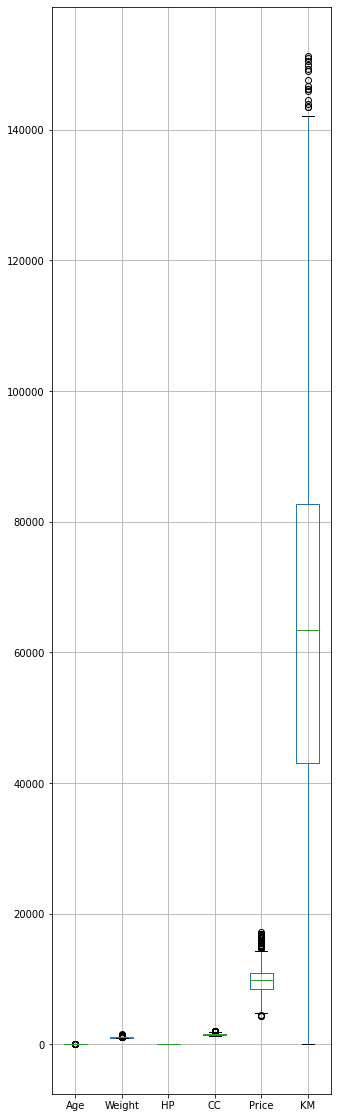

In [939]:

mp.figure(figsize = (5, 20)) 
  
df.boxplot()

In [940]:
# Apply the functions to the data
df2[['Age','Weight','HP', 'CC','Price','KM']] = df2[['Age','Weight','HP', 'CC','Price','KM']].apply(replace_outliers_median)


In [941]:

df = pd.DataFrame(df2, columns = ['Age','Weight','HP', 'CC','Price','KM'])  
df

,Age,Weight,HP,CC,Price,KM
0,23.0,1165.0,90,2000.0,13500,46986
1,23.0,1165.0,90,2000.0,13750,72937
2,24.0,1165.0,90,2000.0,13950,41711
3,26.0,1165.0,90,2000.0,9900,48000
4,30.0,1170.0,90,2000.0,13750,38500
...,...,...,...,...,...,...
1431,69.0,1025.0,86,1300.0,7500,20544
1432,72.0,1015.0,86,1300.0,10845,19000
1433,71.0,1015.0,86,1300.0,8500,17016
1434,70.0,1015.0,86,1300.0,7250,16916


<AxesSubplot:>

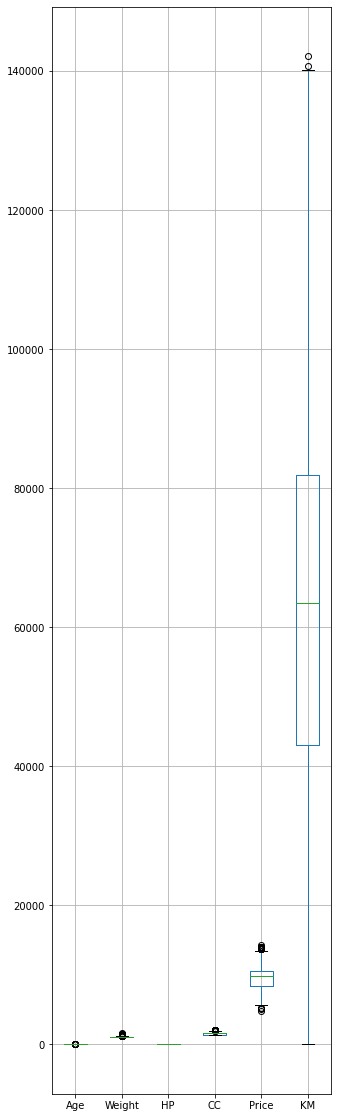

In [942]:

mp.figure(figsize = (5, 20)) 
  
df.boxplot()

In [943]:
# Apply the functions to the data
df2[['Age','Weight','HP', 'CC','Price','KM']] = df2[['Age','Weight','HP', 'CC','Price','KM']].apply(replace_outliers_median)


In [944]:
# Apply the functions to the data
df2[['Age','Weight','HP', 'CC','Price','KM']] = df2[['Age','Weight','HP', 'CC','Price','KM']].apply(replace_outliers_median)


In [945]:

df = pd.DataFrame(df2, columns = ['Age','Weight','HP', 'CC','Price','KM'])  
df

,Age,Weight,HP,CC,Price,KM
0,23.0,1165.0,90,2000.0,13500,46986
1,23.0,1165.0,90,2000.0,9900,72937
2,24.0,1165.0,90,2000.0,9900,41711
3,26.0,1165.0,90,2000.0,9900,48000
4,30.0,1170.0,90,2000.0,9900,38500
...,...,...,...,...,...,...
1431,69.0,1025.0,86,1300.0,7500,20544
1432,72.0,1015.0,86,1300.0,10845,19000
1433,71.0,1015.0,86,1300.0,8500,17016
1434,70.0,1015.0,86,1300.0,7250,16916


<AxesSubplot:>

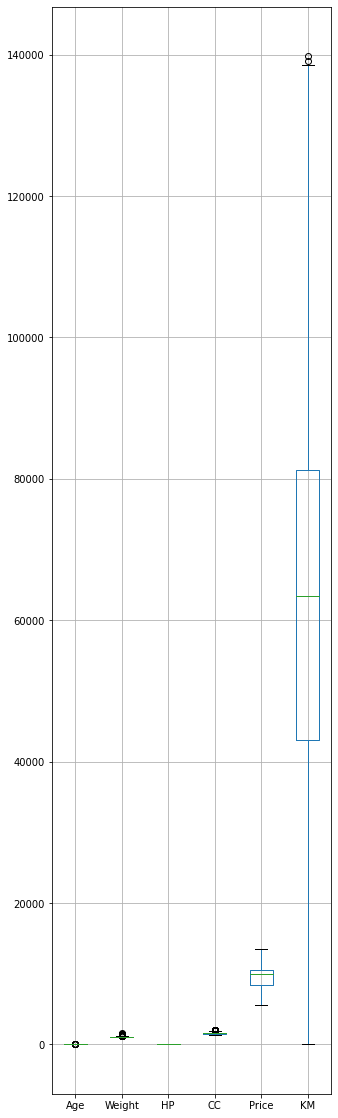

In [946]:

mp.figure(figsize = (5, 20)) 
  
df.boxplot()

In [947]:
# Apply the functions to the data
df2[['Age','Weight','CC','KM']] = df2[['Age','Weight','CC','KM']].apply(replace_outliers_median)


In [948]:
# Apply the functions to the data
df2[['Age','Weight','CC','KM']] = df2[['Age','Weight','CC','KM']].apply(replace_outliers_median)


In [949]:

df = pd.DataFrame(df2, columns = ['Age','Weight', 'CC','KM'])  
df

,Age,Weight,CC,KM
0,23.0,1165.0,2000.0,46986
1,23.0,1165.0,2000.0,72937
2,24.0,1165.0,2000.0,41711
3,26.0,1165.0,2000.0,48000
4,30.0,1170.0,2000.0,38500
...,...,...,...,...
1431,69.0,1025.0,1300.0,20544
1432,72.0,1015.0,1300.0,19000
1433,71.0,1015.0,1300.0,17016
1434,70.0,1015.0,1300.0,16916


<AxesSubplot:>

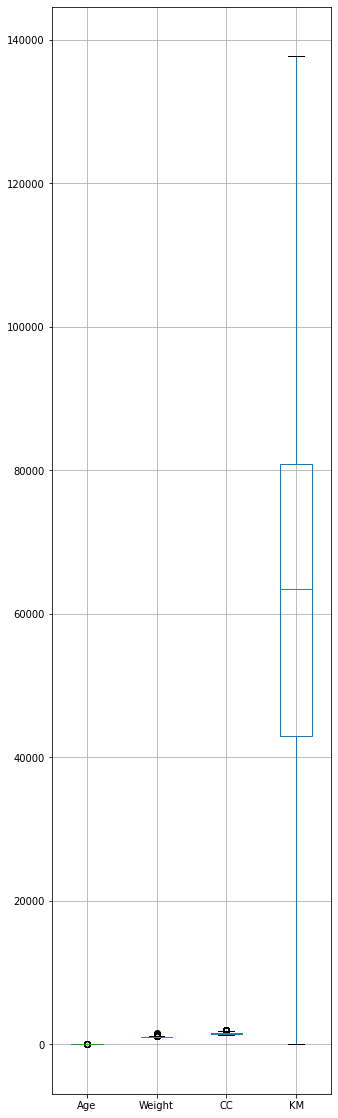

In [950]:

mp.figure(figsize = (5, 20)) 
  
df.boxplot()

In [951]:
# Apply the functions to the data
df2[['Age','Weight','CC']] = df2[['Age','Weight','CC']].apply(replace_outliers_median)


In [952]:
# Apply the functions to the data
df2[['Age','Weight','CC']] = df2[['Age','Weight','CC']].apply(replace_outliers_median)


In [953]:

df = pd.DataFrame(df2, columns = ['Age','Weight', 'CC'])  
df

,Age,Weight,CC
0,23.0,1165.0,2000.0
1,23.0,1165.0,2000.0
2,24.0,1165.0,2000.0
3,26.0,1165.0,2000.0
4,30.0,1170.0,2000.0
...,...,...,...
1431,69.0,1025.0,1300.0
1432,72.0,1015.0,1300.0
1433,71.0,1015.0,1300.0
1434,70.0,1015.0,1300.0


<AxesSubplot:>

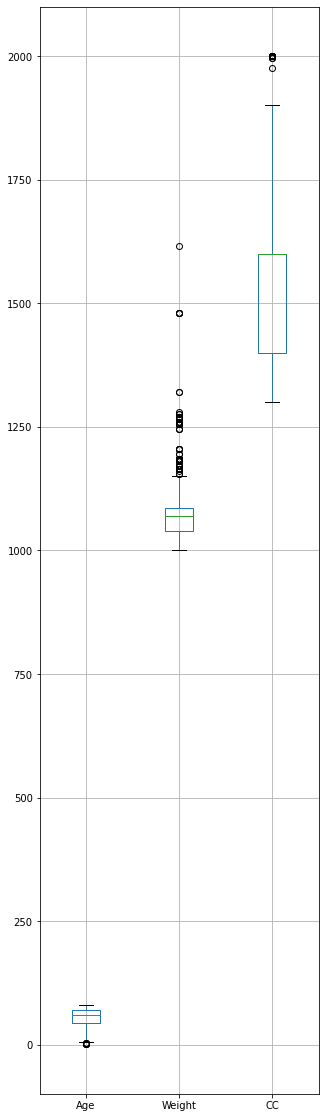

In [954]:

mp.figure(figsize = (5, 20)) 
  
df.boxplot()

In [955]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR

    ls = df.index[(df[ft]<lower_limit) | (df[ft]>upper_limit)]

    return ls

In [956]:
index_list = []
for features in ['Age','CC','Weight']:
    index_list.extend(outliers(df2, features))

In [957]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [958]:
df2 = remove(df2, index_list)

In [959]:
df2.shape

(1288, 12)

In [960]:

df = pd.DataFrame(df2, columns = ['Age','Weight', 'CC'])  
df

,Age,Weight,CC
9,23.0,1105.0,1900.0
17,24.0,1105.0,1600.0
18,24.0,1065.0,1600.0
19,30.0,1105.0,1600.0
20,30.0,1105.0,1600.0
...,...,...,...
1431,69.0,1025.0,1300.0
1432,72.0,1015.0,1300.0
1433,71.0,1015.0,1300.0
1434,70.0,1015.0,1300.0


<AxesSubplot:>

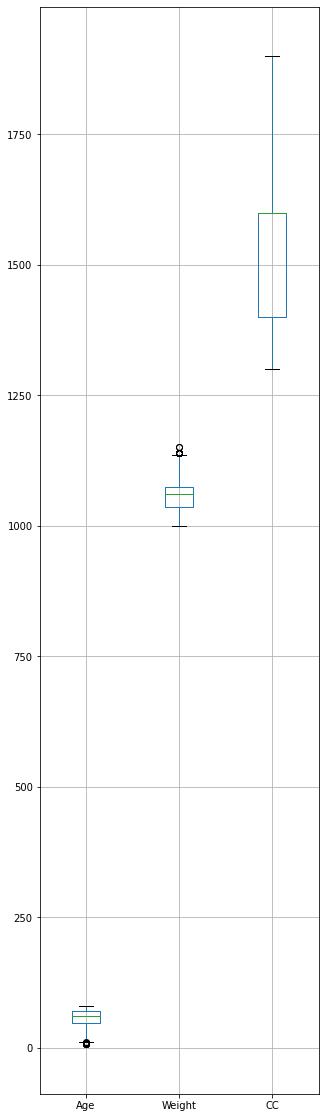

In [961]:

mp.figure(figsize = (5, 20)) 
  
df.boxplot()

In [962]:
index_list = []
for features in ['Age','Weight']:
    index_list.extend(outliers(df2, features))

In [963]:
df2 = remove(df2, index_list)

In [964]:

df = pd.DataFrame(df2, columns = ['Age','Weight'])  
df

,Age,Weight
9,23.0,1105.0
17,24.0,1105.0
18,24.0,1065.0
19,30.0,1105.0
20,30.0,1105.0
...,...,...
1431,69.0,1025.0
1432,72.0,1015.0
1433,71.0,1015.0
1434,70.0,1015.0


<AxesSubplot:>

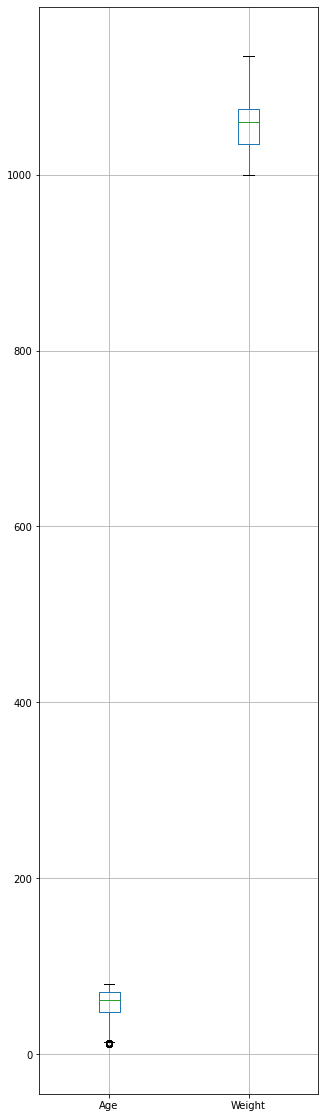

In [965]:

mp.figure(figsize = (5, 20)) 
  
df.boxplot()

In [966]:
index_list = []
for features in ['Age','Weight']:
    index_list.extend(outliers(df2, features))

In [967]:
df2 = remove(df2, index_list)

In [968]:

df = pd.DataFrame(df2, columns = ['Age','Weight'])  
df

,Age,Weight
9,23.0,1105.0
17,24.0,1105.0
18,24.0,1065.0
19,30.0,1105.0
20,30.0,1105.0
...,...,...
1431,69.0,1025.0
1432,72.0,1015.0
1433,71.0,1015.0
1434,70.0,1015.0


<AxesSubplot:>

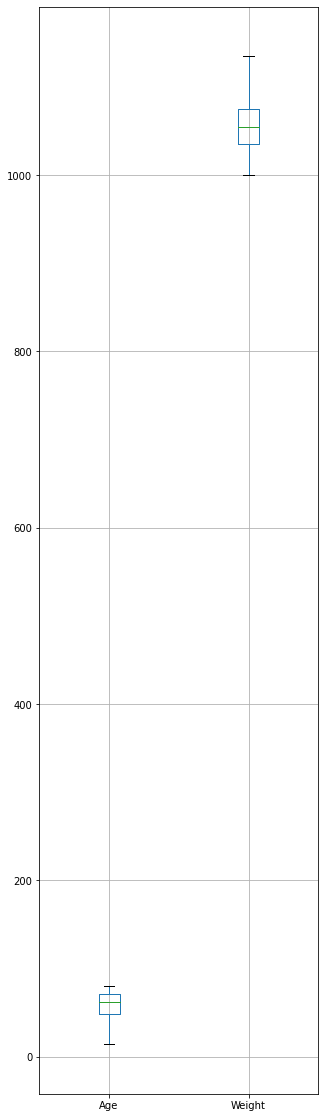

In [969]:

mp.figure(figsize = (5, 20)) 
  
df.boxplot()

In [970]:
df2.isnull().sum()

Price        0
Age          2
KM           0
HP           0
MetColor     0
Automatic    0
CC           2
Doors        0
Weight       2
CNG          0
Diesel       0
Petrol       0
dtype: int64

In [971]:
# Treating missing values of continuous variable with Median value
df2['Weight'].fillna(value=df2['Weight'].median(), inplace=True)
df2['Age'].fillna(value=df2['Age'].median(), inplace=True)

In [972]:
df2['CC'].fillna(value=df2['CC'].mode()[0], inplace=True)

In [973]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 9 to 1435
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1244 non-null   int64  
 1   Age        1244 non-null   float64
 2   KM         1244 non-null   int64  
 3   HP         1244 non-null   int64  
 4   MetColor   1244 non-null   int64  
 5   Automatic  1244 non-null   int64  
 6   CC         1244 non-null   float64
 7   Doors      1244 non-null   int64  
 8   Weight     1244 non-null   float64
 9   CNG        1244 non-null   int64  
 10  Diesel     1244 non-null   int64  
 11  Petrol     1244 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 126.3 KB


In [974]:
df2.nunique()

Price         151
Age            66
KM           1071
HP              6
MetColor        2
Automatic       2
CC              9
Doors           4
Weight         37
CNG             2
Diesel          2
Petrol          2
dtype: int64

In [797]:
NUMFeatures = ['Age','KM','Weight']

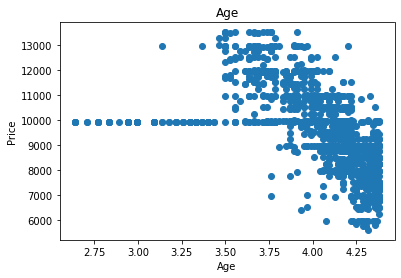

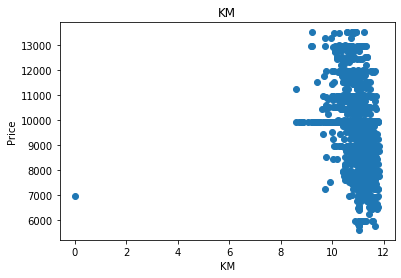

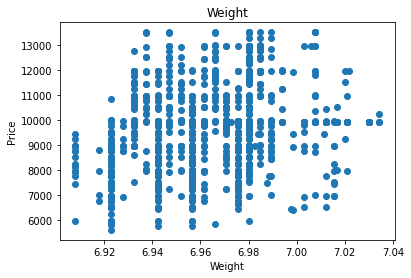

In [798]:
'''
for feature in NUMFeatures:
  df2=df2.copy()
  if 0 not in df2[feature].unique():
    df2[feature]=np.log(df2[feature])
    mp.scatter(df2[feature],df2['Price'])
    mp.xlabel(feature)
    mp.ylabel('Price')
    mp.title(feature)
    mp.show()

In [975]:
df2.columns

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'CNG', 'Diesel', 'Petrol'],
      dtype='object')

In [976]:

df4 = pd.DataFrame(df2, columns = ['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'CNG', 'Diesel', 'Petrol'])  
df4

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,CNG,Diesel,Petrol
9,12950,23.0,71138,69,0,0,1900.0,3,1105.0,0,1,0
17,9900,24.0,21716,110,1,0,1600.0,3,1105.0,0,0,1
18,9900,24.0,25563,110,0,0,1600.0,3,1065.0,0,0,1
19,9900,30.0,64359,110,1,0,1600.0,3,1105.0,0,0,1
20,9900,30.0,67660,110,1,0,1600.0,3,1105.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544,86,1,0,1300.0,3,1025.0,0,0,1
1432,10845,72.0,19000,86,0,0,1300.0,3,1015.0,0,0,1
1433,8500,71.0,17016,86,0,0,1300.0,3,1015.0,0,0,1
1434,7250,70.0,16916,86,1,0,1300.0,3,1015.0,0,0,1


In [977]:

from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(df4)
res = transformer.transform(df4)

In [978]:

df2 = pd.DataFrame(res, columns =['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'CNG', 'Diesel', 'Petrol'])

In [979]:
df2.head(10)

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,CNG,Diesel,Petrol
0,1.441371,-1.695652,0.239075,-3.153846,-1.0,0.0,1.5,-0.5,1.250,0.0,1.0,-1.0
1,0.047086,-1.652174,-1.122085,0.000000,0.0,0.0,0.0,-0.5,1.250,0.0,0.0,0.0
2,0.047086,-1.652174,-1.016132,0.000000,-1.0,0.0,0.0,-0.5,0.250,0.0,0.0,0.0
3,0.047086,-1.391304,0.052370,0.000000,0.0,0.0,0.0,-0.5,1.250,0.0,0.0,0.0
4,0.047086,-1.391304,0.143285,0.000000,0.0,0.0,0.0,-0.5,1.250,0.0,0.0,0.0
5,0.047086,-1.478261,-0.168238,0.000000,0.0,0.0,0.0,-0.5,1.625,0.0,0.0,0.0
6,0.047086,-1.478261,-0.832788,0.000000,0.0,0.0,0.0,-0.5,1.625,0.0,0.0,0.0
7,0.047086,-1.434783,-1.009247,0.000000,0.0,0.0,0.0,-0.5,1.625,0.0,0.0,0.0
8,0.047086,-1.608696,-0.936620,0.000000,0.0,0.0,0.0,-0.5,1.625,0.0,0.0,0.0
9,0.047086,-1.521739,-0.768754,0.000000,0.0,0.0,0.0,-0.5,1.625,0.0,0.0,0.0


In [980]:
df2.shape

(1244, 12)

In [981]:
df2 = df2.drop(columns=['CNG'])

In [982]:
df2.shape

(1244, 11)

In [983]:
# Calculating correlation matrix
ContinuousCols=['Price','Age','KM','Weight']

# Creating the correlation matrix
CorrelationData=df2[ContinuousCols].corr()
CorrelationData

,Price,Age,KM,Weight
Price,1.000000,-0.629635,-0.405654,0.265355
Age,-0.629635,1.000000,0.517878,-0.436773
KM,-0.405654,0.517878,1.000000,-0.170029
Weight,0.265355,-0.436773,-0.170029,1.000000


In [984]:
CorrelationData['Price'][abs(CorrelationData['Price']) > 0.5 ]

Price    1.000000
Age     -0.629635
Name: Price, dtype: float64

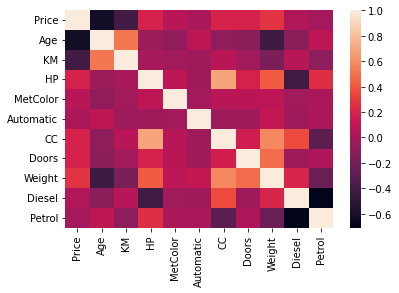

In [985]:
 
  
# plotting correlation heatmap
dataplot=sb.heatmap(df2.corr())
  
# displaying heatmap
mp.show()

In [986]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [987]:
# Calling the function to check which categorical variables are correlated with target
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=[ 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
        'Diesel', 'Petrol']
FunctionAnova(inpData = df2, TargetVariable='Price', CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

HP is correlated with Price | P-Value: 6.715696559921902e-41
MetColor is correlated with Price | P-Value: 0.02089905043970841
Automatic is NOT correlated with Price | P-Value: 0.5690921251310499
CC is correlated with Price | P-Value: 7.413592576964283e-37
Doors is correlated with Price | P-Value: 4.2343159534720185e-12
Diesel is NOT correlated with Price | P-Value: 0.27425299881535153
Petrol is NOT correlated with Price | P-Value: 0.7561258881963029


['HP', 'MetColor', 'CC', 'Doors']

In [988]:
df2.columns

Index(['Price', 'Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'Diesel', 'Petrol'],
      dtype='object')

In [989]:

df2 = df2.drop(columns=['Automatic','Weight'])
df2 = df2.drop(columns=['Petrol','Diesel'])
df2.head()

,Price,Age,KM,HP,MetColor,CC,Doors
0,1.441371,-1.695652,0.239075,-3.153846,-1.0,1.5,-0.5
1,0.047086,-1.652174,-1.122085,0.000000,0.0,0.0,-0.5
2,0.047086,-1.652174,-1.016132,0.000000,-1.0,0.0,-0.5
3,0.047086,-1.391304,0.052370,0.000000,0.0,0.0,-0.5
4,0.047086,-1.391304,0.143285,0.000000,0.0,0.0,-0.5


In [990]:
df2 = df2.reset_index()

In [991]:
df2.head(10)

,index,Price,Age,KM,HP,MetColor,CC,Doors
0,0,1.441371,-1.695652,0.239075,-3.153846,-1.0,1.5,-0.5
1,1,0.047086,-1.652174,-1.122085,0.000000,0.0,0.0,-0.5
2,2,0.047086,-1.652174,-1.016132,0.000000,-1.0,0.0,-0.5
3,3,0.047086,-1.391304,0.052370,0.000000,0.0,0.0,-0.5
4,4,0.047086,-1.391304,0.143285,0.000000,0.0,0.0,-0.5
5,5,0.047086,-1.478261,-0.168238,0.000000,0.0,0.0,-0.5
6,6,0.047086,-1.478261,-0.832788,0.000000,0.0,0.0,-0.5
7,7,0.047086,-1.434783,-1.009247,0.000000,0.0,0.0,-0.5
8,8,0.047086,-1.608696,-0.936620,0.000000,0.0,0.0,-0.5
9,9,0.047086,-1.521739,-0.768754,0.000000,0.0,0.0,-0.5


In [992]:
df2.shape

(1244, 8)

In [993]:
df2 = df2.drop(columns=['index'])

In [994]:
df2.head(10)

,Price,Age,KM,HP,MetColor,CC,Doors
0,1.441371,-1.695652,0.239075,-3.153846,-1.0,1.5,-0.5
1,0.047086,-1.652174,-1.122085,0.000000,0.0,0.0,-0.5
2,0.047086,-1.652174,-1.016132,0.000000,-1.0,0.0,-0.5
3,0.047086,-1.391304,0.052370,0.000000,0.0,0.0,-0.5
4,0.047086,-1.391304,0.143285,0.000000,0.0,0.0,-0.5
5,0.047086,-1.478261,-0.168238,0.000000,0.0,0.0,-0.5
6,0.047086,-1.478261,-0.832788,0.000000,0.0,0.0,-0.5
7,0.047086,-1.434783,-1.009247,0.000000,0.0,0.0,-0.5
8,0.047086,-1.608696,-0.936620,0.000000,0.0,0.0,-0.5
9,0.047086,-1.521739,-0.768754,0.000000,0.0,0.0,-0.5


In [995]:
#df3 = df2.sample(frac = 1)

In [996]:
df2 = df3

In [997]:
df3

,Price,Age,KM,HP,MetColor,CC,Doors
875,0.435657,-0.083759,-1.306715,-1.846154,0.0,-1.5,-0.5
309,-0.387200,-0.400641,0.612141,-1.000000,-1.0,-1.0,-0.5
170,1.692800,-1.610883,-0.406607,-3.153846,0.0,1.5,-0.5
952,-0.844343,0.451955,0.851644,0.000000,0.0,0.0,-0.5
900,-1.758629,0.553468,0.026285,0.000000,-1.0,0.0,0.0
...,...,...,...,...,...,...,...
449,0.547657,-0.306022,-0.898953,0.000000,0.0,0.0,0.0
507,-0.844343,0.235960,1.017722,0.000000,0.0,0.0,-0.5
538,-0.387200,0.120704,0.793056,0.000000,0.0,0.0,0.5
1211,-1.278629,0.417200,-0.460855,-1.846154,-1.0,-1.5,-0.5


In [998]:
X = np.array(df3.drop(["Price"],1))
print("Shape of X:",X.shape)
print(X)

Shape of X: (1244, 6)
[[-0.08375886 -1.30671511 -1.84615385  0.         -1.5        -0.5       ]
 [-0.40064097  0.61214113 -1.         -1.         -1.         -0.5       ]
 [-1.61088344 -0.40660672 -3.15384615  0.          1.5        -0.5       ]
 ...
 [ 0.12070354  0.79305641  0.          0.          0.          0.5       ]
 [ 0.41720019 -0.46085488 -1.84615385 -1.         -1.5        -0.5       ]
 [ 0.          0.51324722  0.          0.          0.         -0.5       ]]


In [999]:
y = np.array(df3["Price"])
print("Shape of y:",y.shape)
print(y)

Shape of y: (1244,)
[ 0.43565714 -0.3872      1.6928     ... -0.3872     -1.27862857
  0.29851429]


In [1000]:
size = X.shape[0]
X_train = X[:int(0.7 * size),:]
X_test = X[int(0.7 * size):,:]
y_train = y[:int(0.7 * size)]
y_test = y[int(0.7 * size):]

In [1001]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(870, 6)
(374, 6)
(870,)
(374,)


In [1002]:
'''
#Standardizing the X_train and X_test daatsets
mu = np.mean(X_train, 0)
sigma = np.std(X_train, 0)

X_train = (X_train - mu ) / sigma

#We use the same mean and SD as the one of X_train as we dont know the mean of X_test
X_test = (X_test - mu ) / sigma

#Standardizing the y_train data
mu_y = np.mean(y_train, 0)
sigma_y = np.std(y_train, 0, ddof = 0)

y_train = (y_train - mu_y ) / sigma_y

SyntaxError: ignored

In [1003]:
y_train = y_train.reshape(len(y_train),1)
y_test = y_test.reshape(len(y_test),1)
y_pred = np.zeros(y_test.shape)
y_train.shape, y_test.shape,y_pred.shape

((870, 1), (374, 1), (374, 1))

In [1004]:
n_neigh = 3
for row in range(len(X_test)):
    euclidian_distance = np.sqrt(np.sum((X_train - X_test[row])**2, axis = 1 ))
    y_pred[row] = np.mean(y_train[np.argsort(euclidian_distance, axis = 0)[:n_neigh]])#mean()* sigma_y + mu_y
    
    
#Finding the root mean squared error 

RMSE = np.sqrt(np.mean((y_pred - y_test)**2))
print(RMSE)

0.5280194644850139


In [1005]:
# Calculate mean absolute error
mae = np.mean(np.abs(y_test - y_pred))

print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.3963778966131908


In [1007]:
# We are setting a range of K values and calculating the RMSE for each of them. This way we can chose the optimal K value
k_list = [x for x in range(1,50,1)]

# Calculating the distance matrix using numpy broadcasting technique 
distance = np.sqrt(((X_train[:, :, None] - X_test[:, :, None].T) ** 2).sum(1))

#Sorting each data points of the distance matrix to reduce computational effort 
sorted_distance = np.argsort(distance, axis = 0)

#The knn function takes in the sorted distance and returns the RMSE of the 
def knn(X_train,X_test,y_train,y_test,sorted_distance,k):
    y_pred = np.zeros(y_test.shape)
    for row in range(len(X_test)):
        
        #Transforming the y_train values to adjust the scale. 
        y_pred[row] = np.mean(y_train[sorted_distance[:,row][:k]])#mean()* sigma_y + mu_y
    

    RMSE = np.sqrt(np.mean((y_test - y_pred)**2))
    return RMSE

#Storing the RMSE values in a list for each k value 
rmse_list = []
for i in k_list:
    rmse_list.append(knn(X_train,X_test,y_train,y_test,sorted_distance,i))

In [1008]:
#Finding the optimal K value
min_rmse_k_value = k_list[rmse_list.index(min(rmse_list))]

#Finding the lowest possible RMSE
optimal_RMSE = knn(X_train,X_test,y_train,y_test,sorted_distance,min_rmse_k_value)
optimal_RMSE

0.4994080847862616

In [1009]:
min_rmse_k_value

7

In [1010]:
odel = knn(X_train, X_test, y_train, y_test, sorted_distance,k=12)
print(odel)

0.5046595302461092


In [1011]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score,mean_absolute_error

print(np.sqrt(mean_squared_error(y_test,y_pred))) 
r2scr = print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.5280194644850139
0.4839690443530007
0.3963778966131908
